In [21]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import os
from six.moves import urllib

warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_csv(os.path.join('hypothyroid.csv'))
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [23]:
df.shape

(3772, 30)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [25]:
df=df.replace({"?":np.NAN})

<Axes: >

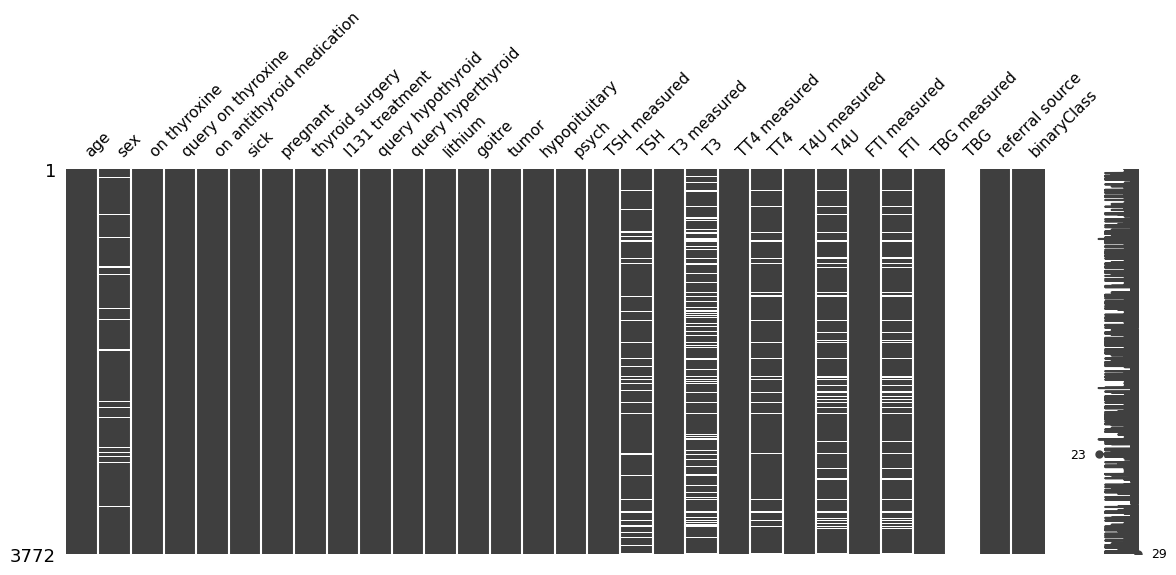

In [26]:
import missingno as msno
msno.matrix(df, figsize=(14,5), fontsize=11)

In [27]:
df.describe()

,TBG
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [28]:
df['TSH'] = df['TSH'].str.replace('?','')
df['TT4'] = df['TT4'].str.replace('?','')
df['T4U'] = df['T4U'].str.replace('?','')
df['FTI'] = df['FTI'].str.replace('?','')
df['age'] = df['age'].str.replace('?','')

In [29]:
df.drop(columns='TBG', inplace=True)

<Axes: xlabel='binaryClass', ylabel='Count'>

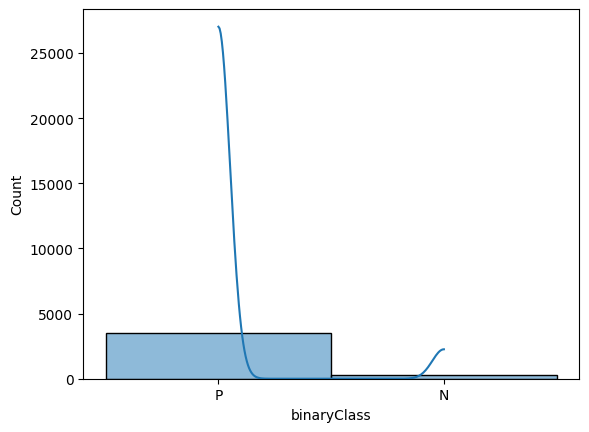

In [30]:
sns.histplot(data=df, x="binaryClass", kde=True)

In [31]:
df['sex'] = df['sex'].str.replace('?','')

In [32]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')
df['T3'] = pd.to_numeric(df['T3'], errors='coerce')
df['TT4'] = pd.to_numeric(df['TT4'], errors='coerce')
df['T4U'] = pd.to_numeric(df['T4U'], errors='coerce')
df['FTI'] = pd.to_numeric(df['FTI'], errors='coerce')

condition = df['age'] > 100
df.drop(df[condition].index, inplace=True)

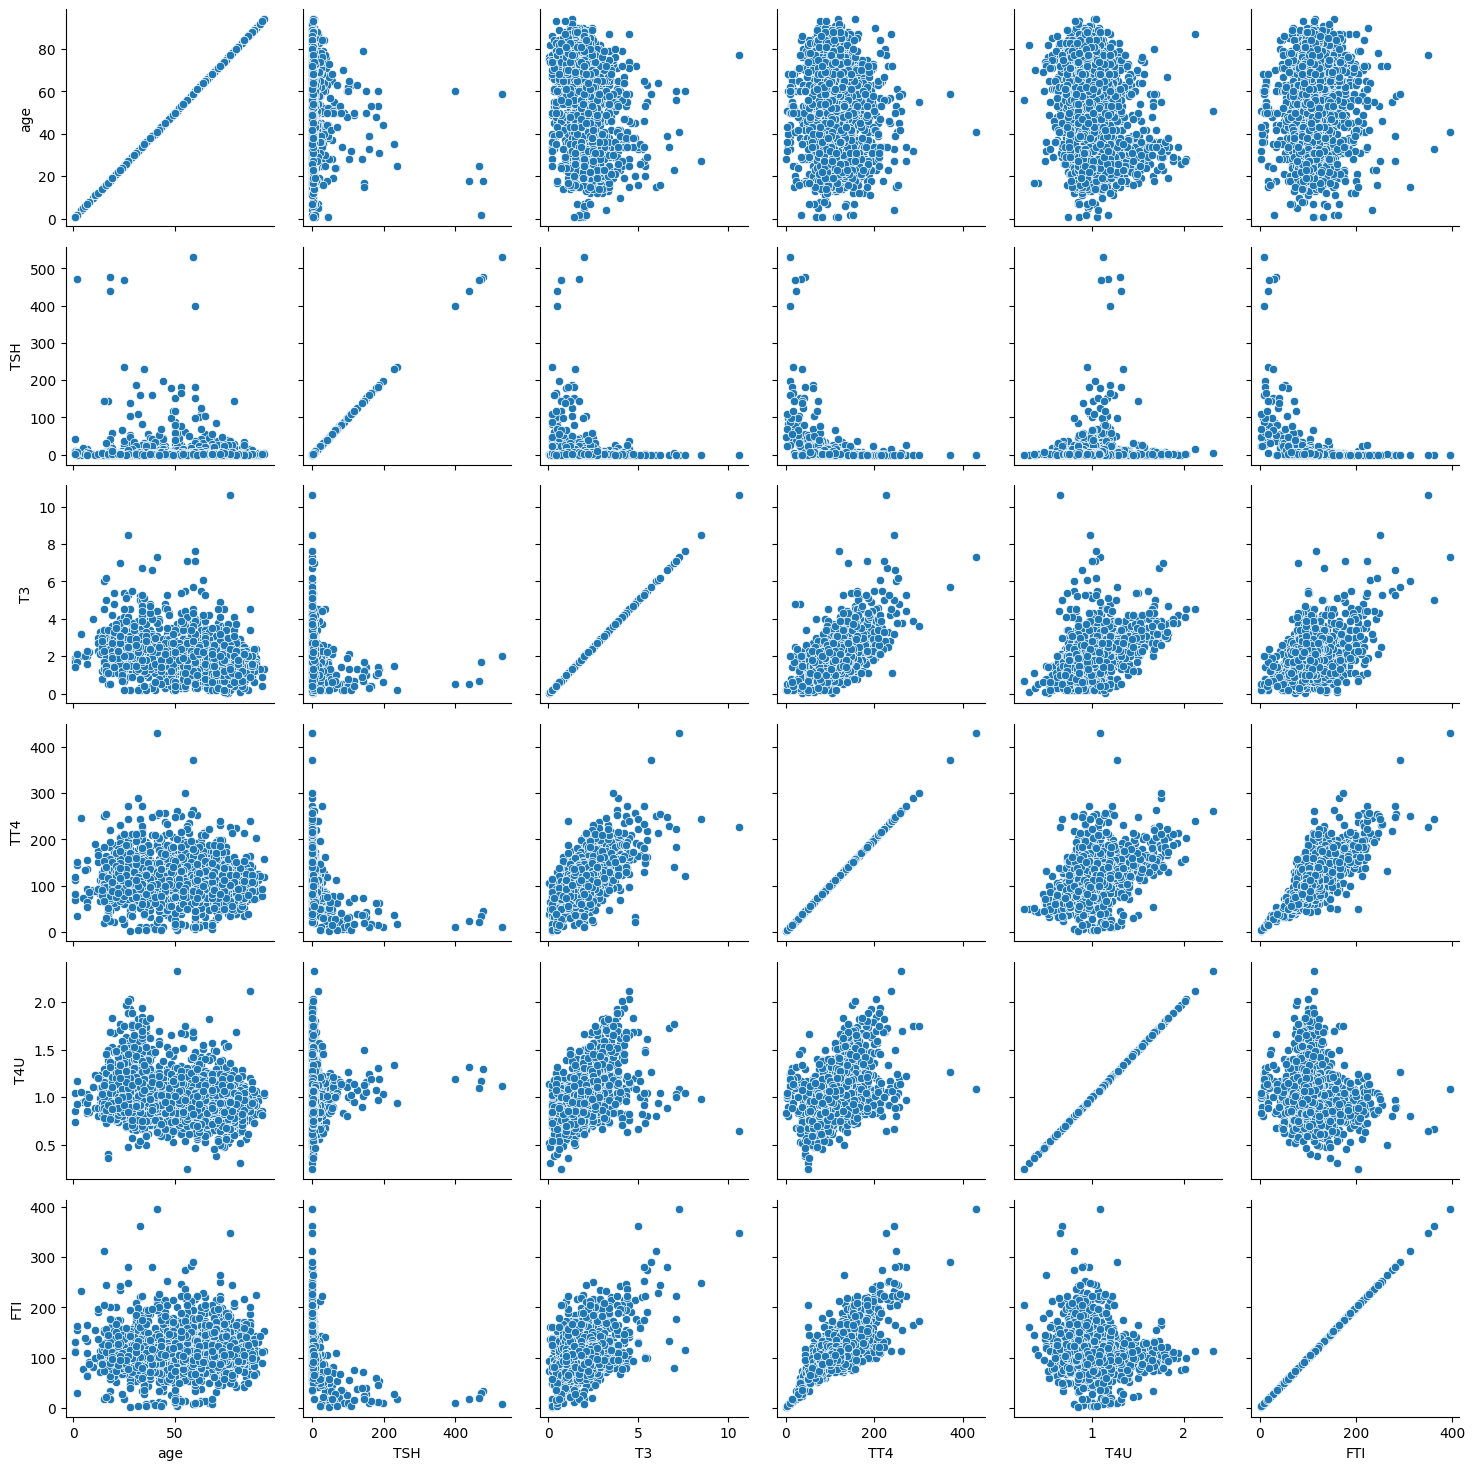

In [34]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3771 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3770 non-null   float64
 1   sex                        3621 non-null   object 
 2   on thyroxine               3771 non-null   object 
 3   query on thyroxine         3771 non-null   object 
 4   on antithyroid medication  3771 non-null   object 
 5   sick                       3771 non-null   object 
 6   pregnant                   3771 non-null   object 
 7   thyroid surgery            3771 non-null   object 
 8   I131 treatment             3771 non-null   object 
 9   query hypothyroid          3771 non-null   object 
 10  query hyperthyroid         3771 non-null   object 
 11  lithium                    3771 non-null   object 
 12  goitre                     3771 non-null   object 
 13  tumor                      3771 non-null   object 
 1

In [36]:
df.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P


In [40]:
df=df.replace({"F":np.NAN})

In [49]:
df = df.fillna(df['sex'].mode().iloc[0])

In [ ]:
                                    df['TSH'].fillna(df['TSH'].median(), inplace=True)
                                    df['T3'].fillna(df['T3'].median(), inplace=True)
                                    df['TT4'].fillna(df['TT4'].median(), inplace=True)
                                    df['T4U'].fillna(df['T4U'].median(), inplace=True)
                                    df['FTI'].fillna(df['FTI'].median(), inplace=True)

<Axes: >

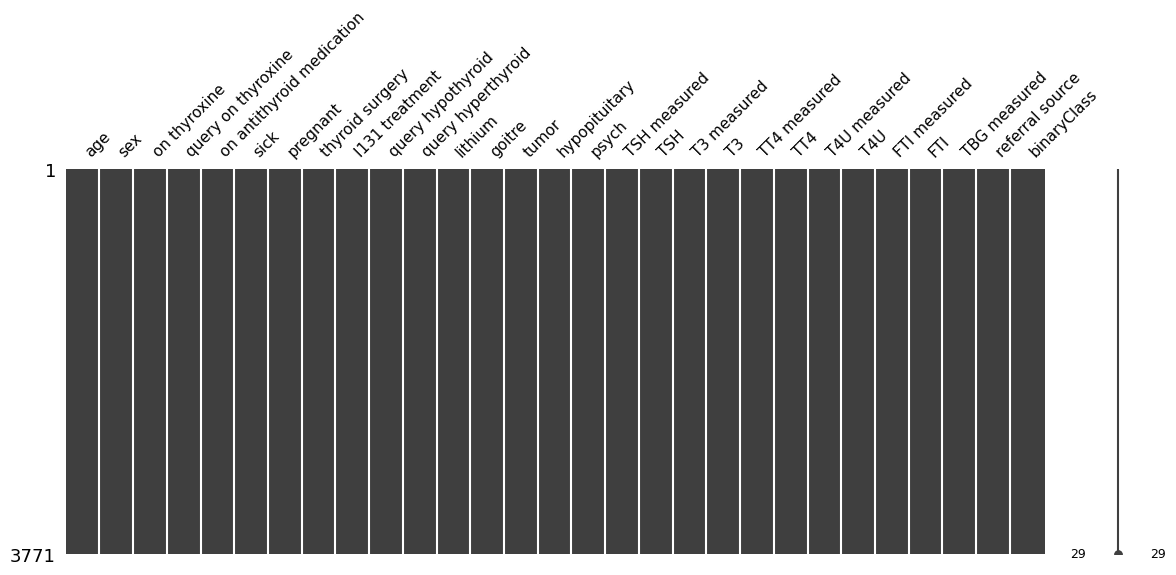

In [44]:
import missingno as msno
msno.matrix(df, figsize=(14,5), fontsize=11)